In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from prophet import Prophet

C:\Users\subomi\anaconda3\envs\sesko\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv")
df.shape

(92016, 5)

In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [5]:
df["FullDate"] = pd.to_datetime(df["FullDate"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [7]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [8]:
df = df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" }) 
df.head()


,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [11]:
df.set_index("ds", inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [12]:
df_daily = df.resample('D').mean()
df_daily.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,15.8,1731.890833,3.69,114.654167
2010-09-02,15.4,1620.791250,3.69,23.783750
2010-09-03,18.3,1736.073333,4.45,21.040625
2010-09-04,13.7,1484.920208,3.39,20.928125
2010-09-05,14.9,1483.808750,4.45,20.856458


In [13]:
df_daily.isnull().values.any()

False

In [39]:
X = df_daily.drop(columns=["Tmax", "SysLoad", "GasPrice", "y"])
y = df_daily["ds" and "y"]

In [40]:
y_train = y.iloc[:2757]
y_test = y.iloc[2757:]
len(y_train)

2757

In [41]:
len(df_daily) == len(y_train) + len(y_test)

True

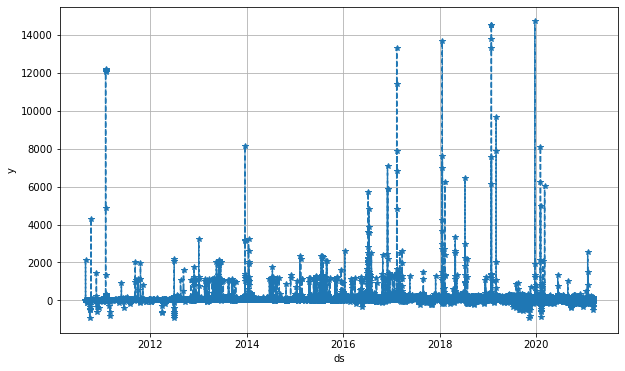

In [47]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.y, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'ds' )
plt.ylabel( 'y' );

In [44]:
y_train.head()

ds
2010-09-01    114.654167
2010-09-02     23.783750
2010-09-03     21.040625
2010-09-04     20.928125
2010-09-05     20.856458
Freq: D, Name: y, dtype: float64

In [ ]:
adfuller(df_daily, )